<a href="https://colab.research.google.com/github/lordpiyush938/CVIP-DataScience/blob/main/speechEmotionRecognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data'):


    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('DataSet is Loaded')


DataSet is Loaded


In [4]:
paths[:6]

['/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_young_fear.wav',
 '/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_take_fear.wav',
 '/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_lease_fear.wav',
 '/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_time_fear.wav',
 '/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_raise_fear.wav',
 '/content/drive/MyDrive/archive (2)/TESS Toronto emotional speech set data/YAF_fear/YAF_phone_fear.wav']

In [5]:
labels[:6]

['fear', 'fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/archive (2)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (2)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (2)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (2)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (2)/TESS Toront...,fear


In [7]:
df['label'].value_counts()

fear         800
happy        800
neutral      800
ps           800
sad          800
disgust      800
angry        800
angry (1)      5
Name: label, dtype: int64

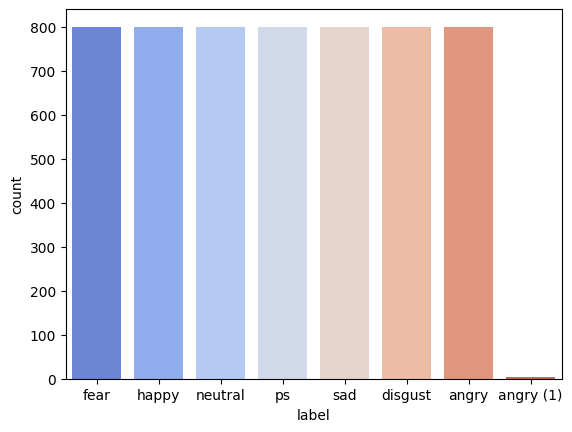

In [8]:
sns.countplot(data = df, x = 'label',palette = 'coolwarm');

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz' )
    plt.colorbar()


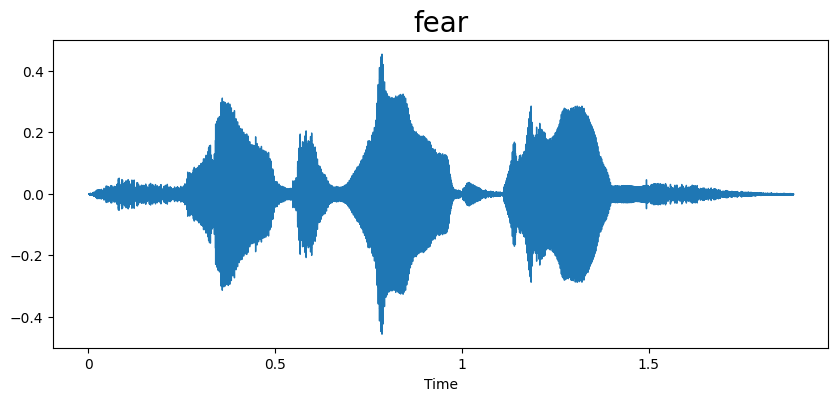

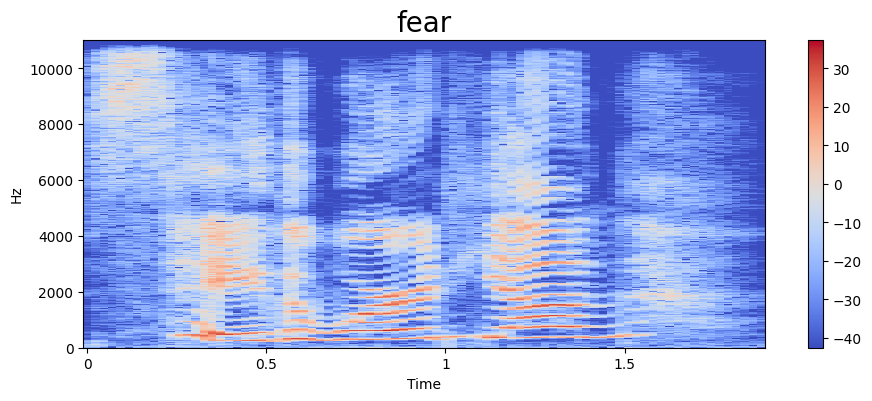

In [10]:
emotion ='fear'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

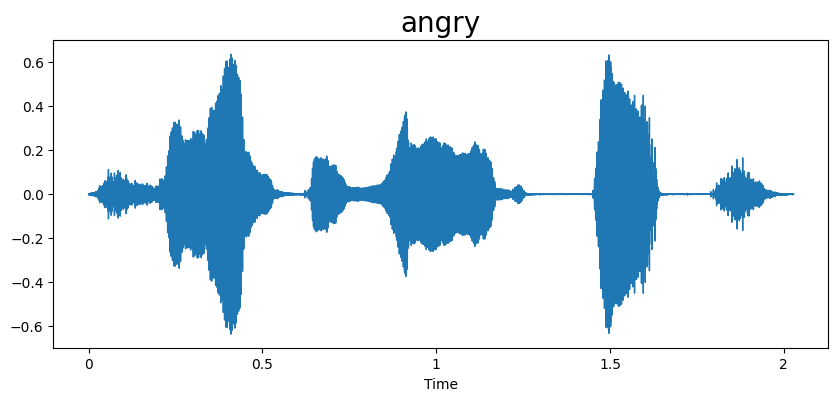

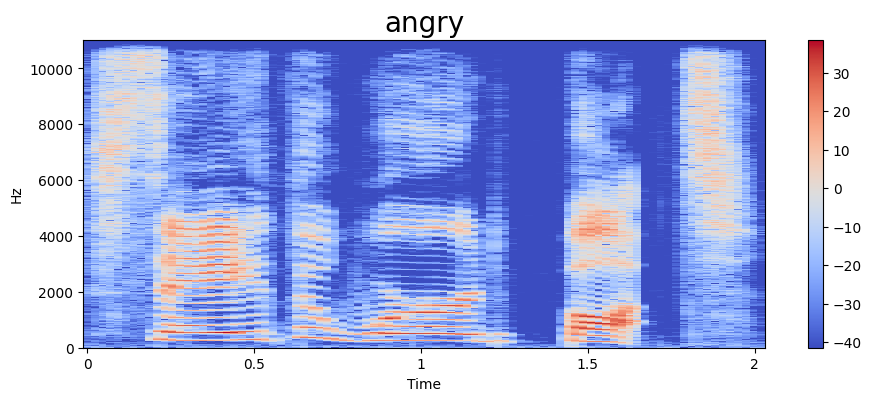

In [11]:
emotion ='angry'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

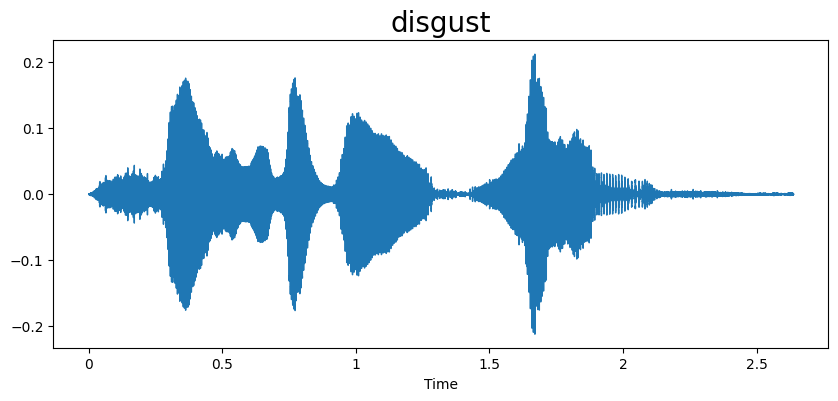

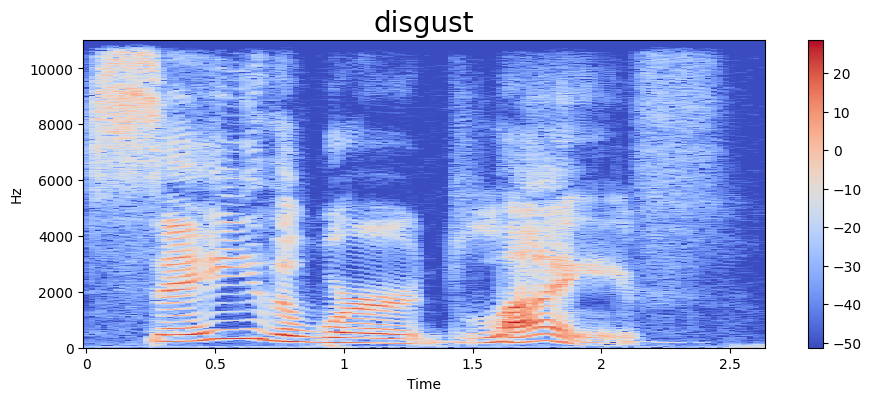

In [12]:
emotion ='disgust'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

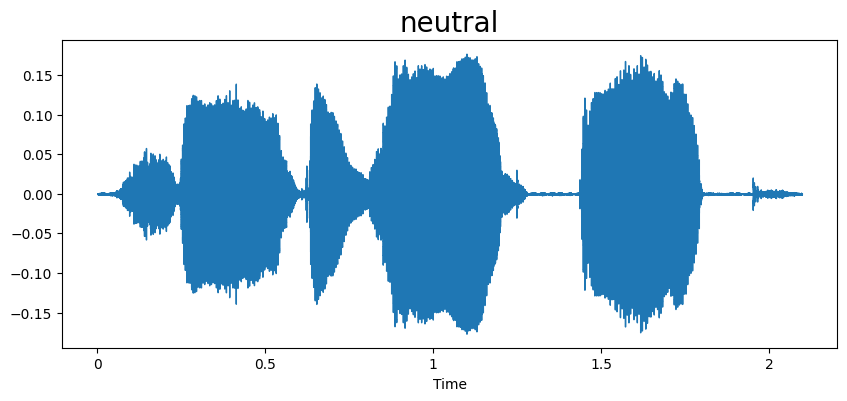

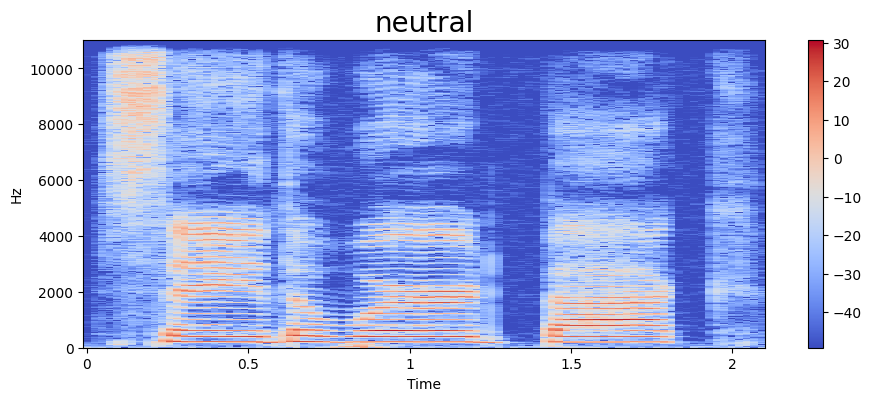

In [13]:
emotion ='neutral'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

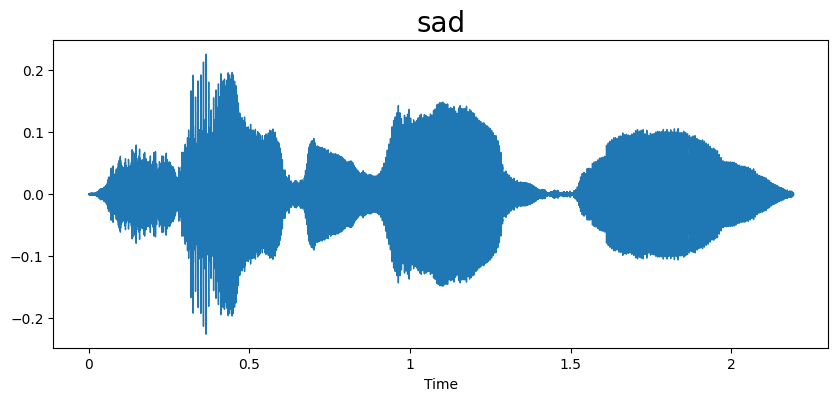

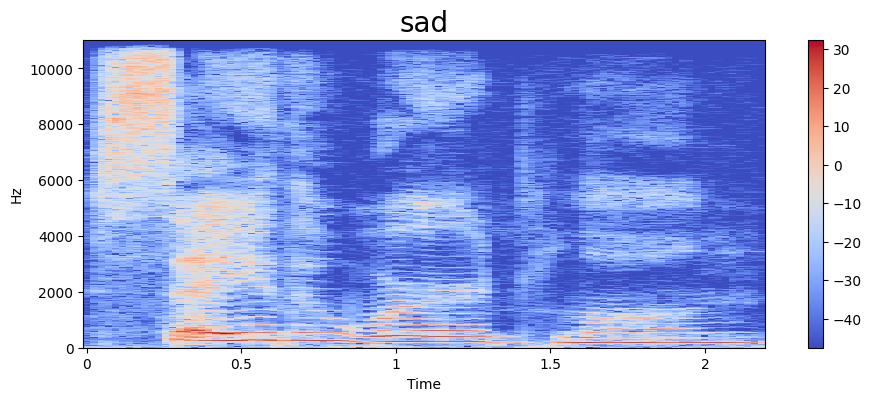

In [14]:
emotion ='sad'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

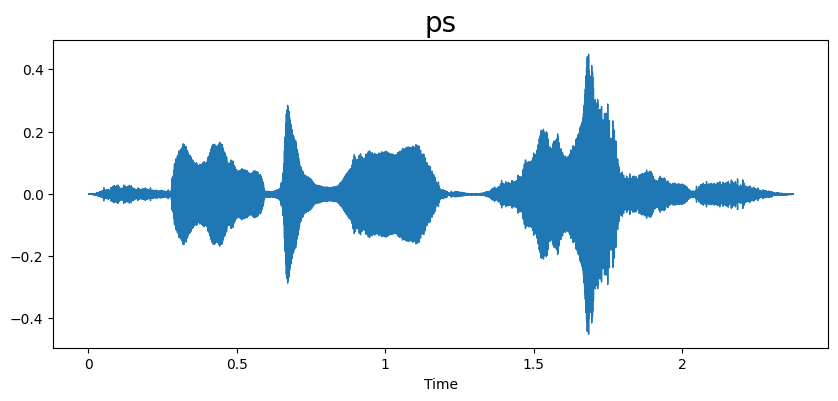

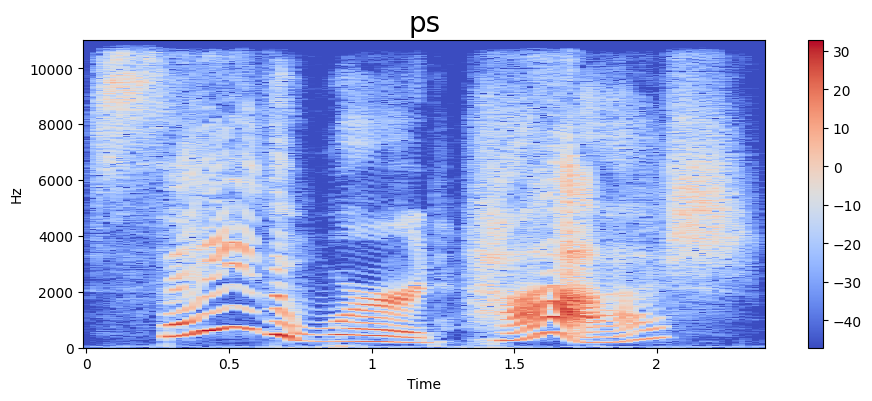

In [15]:
emotion ='ps'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

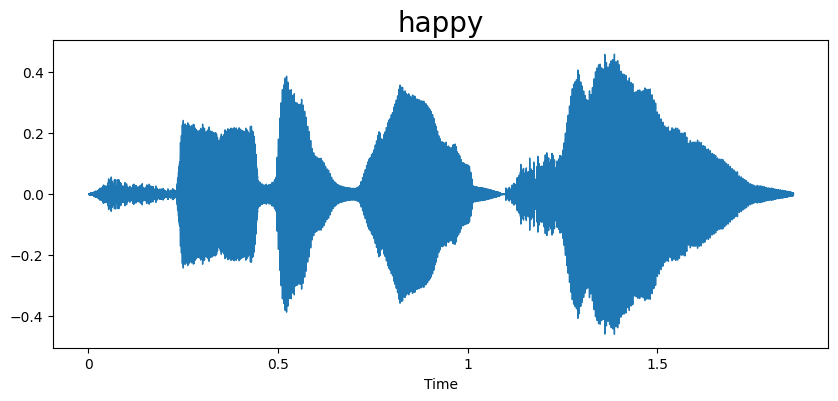

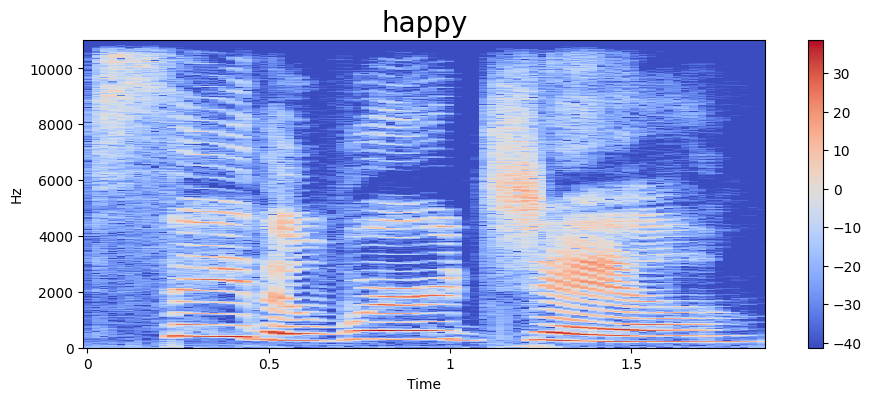

In [16]:
emotion ='happy'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-323.96695   ,   41.730686  ,  -37.704018  ,    9.498198  ,
        -14.843266  ,   -1.3567235 ,   -5.8783746 ,  -15.458604  ,
         -6.3139234 ,    7.1042337 ,  -16.274426  ,    1.2335505 ,
         -5.0114727 ,   -1.040897  ,    1.8829652 ,   -4.461381  ,
         -1.3521135 ,   17.96725   ,    0.38728055,   20.972675  ,
         13.945494  ,    4.332794  ,    4.601165  ,    3.9668882 ,
          1.6277784 ,    9.109777  ,   -8.046583  ,   -1.886792  ,
         -2.63288   ,    2.1022317 ,   -2.8258255 ,   -6.0797105 ,
         -7.287745  ,   -1.1259707 ,    0.73483527,    3.4911969 ,
         -1.4422892 ,    3.9393775 ,    3.6695068 ,    2.4129612 ],
      dtype=float32)

In [20]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
x_mfcc

0       [-323.96695, 41.730686, -37.704018, 9.498198, ...
1       [-303.96533, 28.205715, -25.758223, 29.93225, ...
2       [-318.6472, 26.456356, 4.013815, 21.267887, -1...
3       [-333.81586, 40.91223, -19.69292, 13.061708, -...
4       [-286.69543, 43.852345, -16.071436, 1.9648556,...
                              ...                        
5600    [-438.22562, 89.28834, 20.49539, -13.661688, 4...
5601    [-492.5047, 84.88246, 18.27346, 6.8851466, 16....
5602    [-472.1595, 87.901146, 27.681528, 9.683579, 13...
5603    [-455.0675, 121.302925, 19.078344, -5.3150196,...
5604    [-509.33875, 128.92299, 30.395756, -8.855346, ...
Name: speech, Length: 5605, dtype: object

In [22]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(5605, 40)

In [23]:
x = np.expand_dims(x, -1)
x.shape

(5605, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape

(5605, 8)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(8, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
Total params: 71780 (280.39 KB)
Trainable params: 7178

In [37]:
# Assuming you have properly prepared your data (x and y)
# Ensure that x has the shape (num_samples, 40, 1) and y is one-hot encoded for 7 classes.

history = model.fit(
    x,  # Input data
    y,  # Target data
    validation_split=0.2,  # 20% of data for validation
    epochs=100,
    batch_size=512,
    shuffle=True  # Shuffle the training data
)


Epoch 1/100
9/9 [==============================] - 6s 408ms/step - loss: 1.9519 - accuracy: 0.2480 - val_loss: 1.9391 - val_accuracy: 0.2364
Epoch 2/100
9/9 [==============================] - 4s 421ms/step - loss: 1.6808 - accuracy: 0.4161 - val_loss: 1.5321 - val_accuracy: 0.5022
Epoch 3/100
9/9 [==============================] - 3s 367ms/step - loss: 1.2962 - accuracy: 0.5624 - val_loss: 1.0214 - val_accuracy: 0.5450
Epoch 4/100
9/9 [==============================] - 3s 288ms/step - loss: 0.9184 - accuracy: 0.6566 - val_loss: 0.8018 - val_accuracy: 0.6512
Epoch 5/100
9/9 [==============================] - 3s 289ms/step - loss: 0.6621 - accuracy: 0.7672 - val_loss: 0.6810 - val_accuracy: 0.6851
Epoch 6/100
9/9 [==============================] - 3s 287ms/step - loss: 0.4592 - accuracy: 0.8475 - val_loss: 0.5707 - val_accuracy: 0.7431
Epoch 7/100
9/9 [==============================] - 4s 423ms/step - loss: 0.3820 - accuracy: 0.8791 - val_loss: 0.5216 - val_accuracy: 0.7770
Epoch 8/100
9

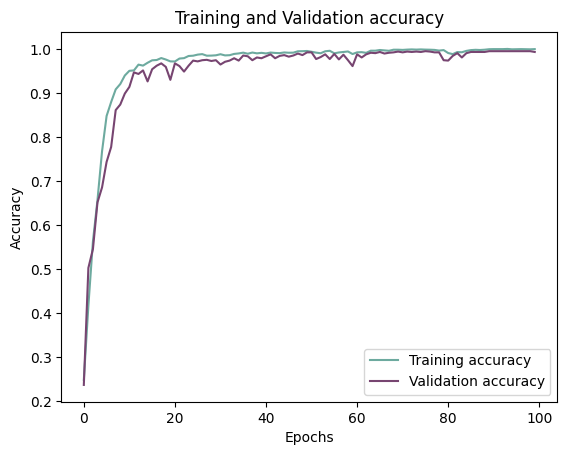

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

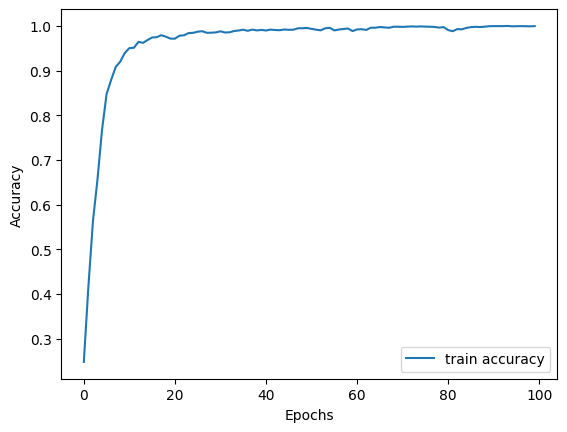

In [39]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy', )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
acc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

96.2392955571413